<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_5_Proyecto_COVID_Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de pacientes COVID-19
En este proyecto guiado implementaremos una red neuronal profunda para la clasificación o diagnóstico de pacientes con sospecha de infección por el virus de la COVID-19 a partir de datos de imagen médica


## Modificar entorno de ejecución y elegir GPU como soporte
Antes de comenzar a escribir el código, vamos a modificar el entorno de ejecución de Google Colab para trabajar con hardware GPU. Para ello, vamos al menú de 'Entorno de ejecución' y seleccionamos la opción 'Cambiar tipo de entorno de ejecución' y en el panel que se abrirá a continuación elegimos GPU en el desplegable 'Aceleración por hardware'.

# A) Importación del dataset

Cargamos las imágenes médicas después de descargarlas desde [este enlace](https://drive.google.com/file/d/1C6nEoNFr8PmqEddHHYGnXGAWNynz22qm/view?usp=sharing) en el archivo .zip suministrado. Utilizaremos el panel de la izquierda para tenerlas en la máquina virtual que ejecutará este cuaderno.
La carpeta de Datos contiene más de dos mil imágenes 2D de radigrafías de toráx en formato jpg. 




Opciones para cargar los datos:


1.   Si tenéis una cuenta en Google Drive montar la unidad y cargar la carpeta de Datos desde ahí



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# El directorio base con la carpeta Datos en Google Drive
base_dir = '/content/drive/MyDrive/Documentos/Master IA/Datasets/Datos'

Mounted at /content/drive


2.   Subir el archivo .zip y descomprimirlo en la MV


In [ ]:
!unzip "/content/Datos.zip" -d "/content/Datos/"
base_dir = '/content/datos

Archive:  /content/Datos.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Datos.zip or
        /content/Datos.zip.zip, and cannot find /content/Datos.zip.ZIP, period.


# B) Importamos las librerías necesarias
Cargamos las librerías Sequential para la configuración de la red formada por capas de convolución y max pooling 2D, capas droptout y capas flatten y dense.

In [ ]:
from tensorflow.keras.models import Sequential # Modelo/clase sobre la que contruirmos las capas de la red
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Conv2D -> para la detección de bordes y definición (nitidez) de la imagen
# Pooling -> reduce el tamaño de los datos, la dimensionalidad de la imagen
# Dropout -> controla el sobreajuste del modelo
# Flatten -> transforma la materiz de caracterísitcas en un vector 1D
# Dense conecta el vector de características con el vector de datos de entradas, predicciones de las etiquetas
from tensorflow.keras.optimizers import Adam
# Emplearemos Adam como optimizador
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Nos permite realizar tareas de aumento de datos
import numpy as np
import matplotlib.pyplot as plt

print("\n - A) Importamos las librerías necesarioas\n") 

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 29.82 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
# Definimos las rutas a las carpetas con las imágenes de entrenamiento y validación
import os
import os.path as op
# Directorio base con las carpetas train y test que contienen las imágenes
# que utilizaremos para el entrenamiento y la validación del modelo
base_dir = '/content/datasets/Data'
train_dir = op.join(base_dir, 'train')
test_dir = op.join(base_dir, 'test')

# Dentro de cada conjunto tenemos dos directorios con radiografías de tórax
# para cada grupo: COVID o Normal
train_covid_dir = op.join(train_dir, 'COVID19')
train_normal_dir = op.join(train_dir, 'NORMAL')
test_covid_dir = op.join(test_dir, 'COVID19')
test_normal_dir = op.join(test_dir, 'NORMAL')

In [ ]:
# Echamos un vistazo a las imágenes
# Conjunto de entrenamiento
train_covid_names = sorted(os.listdir(train_covid_dir))
print("\n - Primeras 10 imágenes de entrenamiento (COVID):", train_covid_names[0:10])
train_normal_names = sorted(os.listdir(train_normal_dir))
print("\n - Primeras 10 imágenes de entrenamiento (NORMAL):", train_normal_names[0:10])
# Conjunto de evaluación
test_covid_names = sorted(os.listdir(test_covid_dir))
print("\n - Primeras 10 imágenes de evaluación (COVID):", test_covid_names[0:10])
test_normal_names = sorted(os.listdir(test_normal_dir))
print("\n - Primeras 10 imágenes de evaluación (NORMAL):", test_normal_names[0:10])


 - Primeras 10 imágenes de entrenamiento (COVID): ['COVID-19 (1).jpeg', 'COVID-19 (1).png', 'COVID-19 (10).jpeg', 'COVID-19 (101).jpg', 'COVID-19 (107).jpg', 'COVID-19 (11).jpeg', 'COVID-19 (11).jpg', 'COVID-19 (12).jpeg', 'COVID-19 (12).jpg', 'COVID-19 (13).jpeg']

 - Primeras 10 imágenes de entrenamiento (NORMAL): ['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']

 - Primeras 10 imágenes de evaluación (COVID): ['COVID-19 (313).jpg', 'COVID-19 (353).jpg', 'COVID-19 (371).jpg', 'COVID-19 (425).jpg', 'COVID-19 (439).jpg', 'COVID-19 (457).jpg', 'COVID-19 (461).jpg', 'COVID-19 (475).jpg', 'COVID-19 (479).jpg', 'COVID-19 (485).jpg']

 - Primeras 10 imágenes de evaluación (NORMAL): ['NORMAL(10).jpg', 'NORMAL(1001).jpg', 'NORMAL(1003).jpg', 'NORMAL(1004).jpg', 'NORMAL(1011).jpg', 'NORMAL(1012).jpg', 'NORMAL(1015).jpg', 'NORMAL(1017).jpg', 'NORMAL(10

In [ ]:
# Cuántas imágenes tenemos en nuestros conjuntos de datos
print(" => Imágenes en el conjunto de entrenamiento:", len(train_covid_names+train_normal_names))
print(" => Imágenes en el conjunto de evaluación:", len(test_covid_names+test_normal_names))

 => Imágenes en el conjunto de entrenamiento: 1811
 => Imágenes en el conjunto de evaluación: 484


# C) Visualización de las imágenes

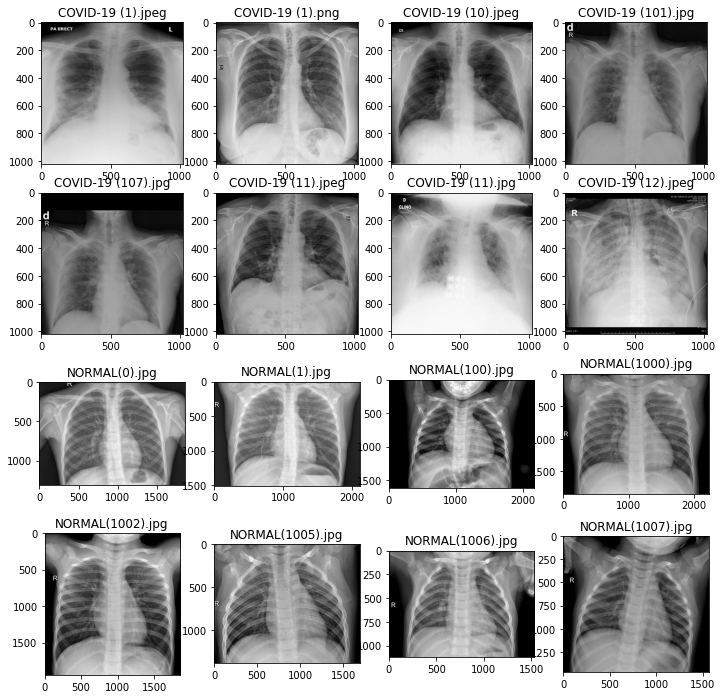

In [ ]:
# Vamos a visualizar algunas imágenes del conjunto de datos en una cuadrícula 4x4
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

fig = plt.figure(1, figsize=(12, 12))
gs = gridspec.GridSpec(4, 4, figure=fig)
covid_pics = [op.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pics = [op.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
merger_pics = covid_pics + normal_pics
for i, pic_path in enumerate(merger_pics):
  pic_name = op.basename(merger_pics[i])
  ax = fig.add_subplot(gs[i])
  pic_data = mpimg.imread(pic_path)
  ax.imshow(pic_data, cmap='gray')
  ax.set_title(pic_name)
plt.show()


# D) Pre-procesado y Aumento de datos

In [ ]:
# Generamos los lotes de entrenamiento, evaluación y validación
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_test = ImageDataGenerator(rescale=1./255)
dgen_val = ImageDataGenerator(rescale=1./255)
# Sobre cada grupo aplicamos una renormalización para que los datos estén
# en el intervalo 0-1 (el valor máximo de intensidad es 255)
# Sobre el conjunto de entrenamiento aplicamos métodos de aumento de datos
# zoom_range -> porcentaje máximo de zoom sobre la imagen
# horizontal_flip -> aplicar desplazamiento horizontal 

# Creamos los generadores de lotes conteniendo el 80% de las imágenes en el
# grupo de entrenamiento y el 20% restante en el de validación
train_generator = dgen_train.flow_from_directory(train_dir,
                                           target_size=(150, 150),
                                           subset = 'training',
                                           batch_size = 32,
                                           class_mode = 'binary')
# Target size -> redimensiona las imágenes para que se acomoden en un tamaño de 150x150 píxeles
# Mode -> especifica que estos datos se utilizarán en la fase de entrenamiento
# batch_size -> número de imágenes que cargaremos en memoria en cada paso del proceso de aprendizaje
# class_mode -> binary para clasificación dicotómica (COVID / Normal), categorical para identificar etiquetas

val_generator = dgen_train.flow_from_directory(train_dir,
                                           target_size=(150, 150),
                                           subset = 'validation',
                                           batch_size = 32,
                                           class_mode = 'binary')

test_generator = dgen_train.flow_from_directory(test_dir,
                                           target_size=(150, 150),
                                           batch_size = 32,
                                           class_mode = 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
# Como sabemos, las dos clases de nuestro problema son COVID y Normal, veámoslo:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
# Veámos también cuál es el tamaño de la muestra para el entrenamiento del modelo
train_generator.image_shape
# El tamaño de las imágenes es 150x150 y el valor de dimensión tres nos indica que las imágenes
# están en formato RGB, donde el color de cada pixel es una combinación de rojo+verde+azul

(150, 150, 3)

# E) Construcción de la Red Neuronal Convolucional

In [ ]:
# En este punto ya podemos definir nuestro modelo de RN convolucional que aprenderá
# de los datos agrupados que hemos trabajado anteriorment
# Construiremos el modelo añadiendo capas a una instancia de la clase Sequencial

model = Sequential()

# La primera capa que utilizaremos para extraer caracterísiticas de la imagen es
# una capa de convolución que aplica filtros formados por pequeños cuadrados que 
# mapean la imagen de entrada. Seleccionaremos 32 características a extraer
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='SAME', activation='relu', input_shape=(150, 150, 3))) 
# Añadimos la capa Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Capa Dropout que 
model.add(Dropout(0.5))

# Vamos a añadir una segunda capa de convolución
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='SAME', activation='relu'))
# Y las sucesivas capas de Pooling y Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Ahora podemos añadir la capa Flatten 
model.add(Flatten())

# La capa densamente conexa en la que especificamos los nodos y el
# tipo de activiación
model.add(Dense(256, activation='relu'))

# Añadirmos una nueva operación Dropout que reduce a la mitad el número de nodos
model.add(Dropout(0.5))

# Y finalemente conectamos los nodos para crear la salida con un único nodo
# Dado que estamos ante un problema de clasificación usaremos la función de activación
# sigmoidea
model.add(Dense(1, activation='sigmoid')) 

# Resumen del modelo
print("Resumen del modelo:\n", model.summary())
# En este resumen vemos que el tamaño del primer tensor tiene valor None porque 
# se refiere a la dimensionalidad del tamaño de lote, que puede tomar cualquier valor
# que mejor modelo produzca

# Tras la aplicación de la capa de convolución tenemos un tensor de dimensión igual a 
# la mitad de la imagen de entrada y con 32 características en el eje z

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 37, 37, 64)      

# F) Compilar y Entrenar el Modelo

In [ ]:
# Para compilar nuestro modelo de RNC tendremos que:
# 1) Definir el método de optimización (Adam)
# 2) El valor para el learning_rate
# 3) La función de pérdidad: bynary cross entropy es una buena elección para una tarea de clasificación binaria
# 4) La métrica de evaluación: utilizaremos accuracy
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Compilado el modelo podemos lanzar el proceso de entrenamiento
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator)
# El objeto history registra el progreso durante el entrenamiento, recoge el valor de la función de pérdida
# y la métrica de evaluación en cada paso del proceso 

Epoch 1/30
46/46 [==============================] - 58s 1s/step - loss: 0.1811 - accuracy: 0.9393 - val_loss: 0.3181 - val_accuracy: 0.9116
Epoch 2/30
46/46 [==============================] - 57s 1s/step - loss: 0.1351 - accuracy: 0.9538 - val_loss: 0.1018 - val_accuracy: 0.9724
Epoch 3/30
46/46 [==============================] - 58s 1s/step - loss: 0.1278 - accuracy: 0.9600 - val_loss: 0.1121 - val_accuracy: 0.9696
Epoch 4/30
46/46 [==============================] - 59s 1s/step - loss: 0.1232 - accuracy: 0.9572 - val_loss: 0.1196 - val_accuracy: 0.9669
Epoch 5/30
46/46 [==============================] - 58s 1s/step - loss: 0.1657 - accuracy: 0.9393 - val_loss: 0.3040 - val_accuracy: 0.9448
Epoch 6/30
46/46 [==============================] - 58s 1s/step - loss: 0.1495 - accuracy: 0.9538 - val_loss: 0.0995 - val_accuracy: 0.9641
Epoch 7/30
46/46 [==============================] - 58s 1s/step - loss: 0.1106 - accuracy: 0.9683 - val_loss: 0.1665 - val_accuracy: 0.9392
Epoch 8/30
46/46 [==

# G) Evaluación del desempeño

In [ ]:
# Veámos que los valores de loss y accuracy se han almacenado en history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'época')

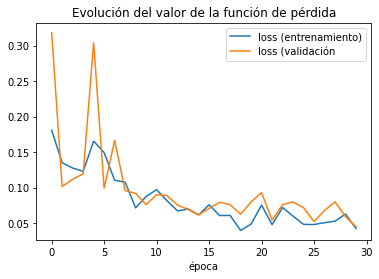

In [ ]:
# Para evaluar el rendimiento del modelo representamos los valores de las métricas de interés en función de la
# época del entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss (entrenamiento)', 'loss (validación'])
plt.title("Evolución del valor de la función de pérdida")
plt.xlabel('época')

Text(0.5, 0, 'época')

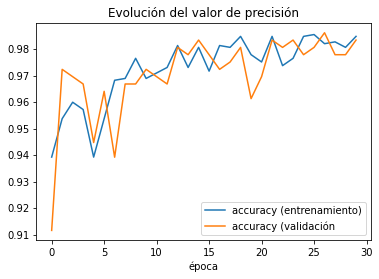

In [ ]:
# Un vistazo a la evolución de la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Precisión (entrenamiento)', 'Precisión (validación)'])
plt.title("Evolución del valor de precisión")
plt.xlabel('época')

In [ ]:
# Por último, validamos el modelo sobre la muestra de evaluación
test_loss, test_accuracy = model.evaluate(test_generator)
# Simplemente tenemos que evaluar el modelo que acabamos de entrenar sobre el conjunto de datos que habíamos
# reservado para la evaluación 
print("\n=> Resultados sobre el conjunto de pruebas:")
print(" - Loss: {:.2f}, Accuracy: {:.2f} ".format(test_loss, test_accuracy))


16/16 [==============================] - 13s 782ms/step - loss: 0.0787 - accuracy: 0.9773

=> Resultados sobre el conjunto de pruebas:
 - Loss: 0.08, Accuracy: 0.98 


# H) Resultados (predicciones) sobre datos no vistos

In [ ]:
# En esta última acción evaluaremos nuestro modelo sobre todo el conjunto de imágenes de radiografías torácicas
# para obtener un resultado (predicción) para el paciente: infección COVID o sano
from google.colab import files
from keras.preprocessing import image
from PIL import Image
uploads = files.upload()
for filename in uploads.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size=(150, 150))
  data = image.img_to_array(img)
  data = np.expand_dims(data, axis=0)
  prediction = model.predict(data)
  print("\nImagen Rayos-X:", filename)

  if prediction == 0:
    print(" => Detectado COVID-19")
  else:
    print(" => Estado normal")




Saving covid2.jpeg to covid2.jpeg

Imagen Rayos-X: covid2.jpeg
 => Detectado COVID-19
